# Superstore Sales Data Analysis

## 1. Introduction
**Objective:** Analyze historical sales data to identify trends, top products, and regional performance.  


**Tools Used:** Python, Pandas, Matplotlib, Seaborn  


**Dataset Source:** [Kaggle Superstore Dataset](https://www.kaggle.com/datasets/vivek468/superstore-dataset-final)


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("data/Sample - Superstore.csv", encoding = "ANSI")

## 2. Data Preparation


In [7]:
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

Checked for missing values – no major issues found.


In [5]:
df['Order Date'] = pd.to_datetime(df["Order Date"])
df['Ship Date'] = pd.to_datetime(df["Ship Date"])

## 3. Sales & Profit Overview


In [6]:
total_sales = df['Sales'].sum().round(2)
total_profit = df['Profit'].sum().round(2)

print(f"Total Sales: ${df['Sales'].sum():,.2f}")
print(f"Total Profit: ${df['Profit'].sum():,.2f}")

Total Sales: $2,297,200.86
Total Profit: $286,397.02


In [7]:
df["year-month"] = df['Order Date'].dt.to_period('M').astype(str)

monthly_sales = df.groupby("year-month")["Sales"].sum().reset_index()

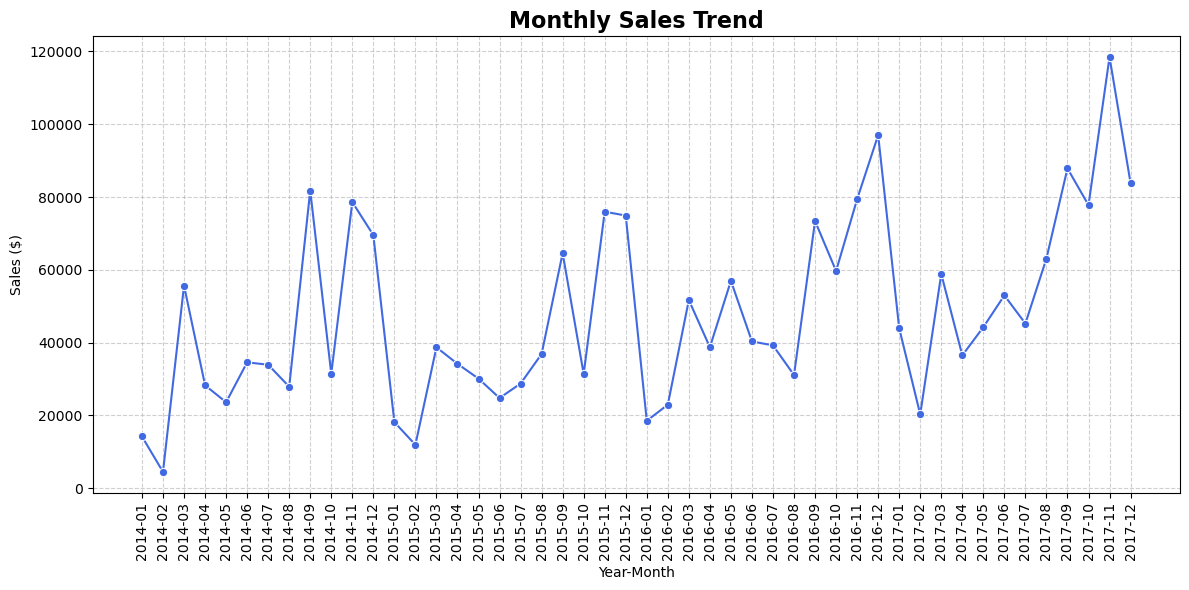

<Figure size 640x480 with 0 Axes>

In [15]:
plt.figure(figsize=(12,6))
sns.lineplot(data=monthly_sales, x="year-month", y="Sales", marker="o", color="royalblue")
plt.title("Monthly Sales Trend", fontsize=16, fontweight="bold")
plt.xlabel("Year-Month")
plt.ylabel("Sales ($)")
plt.xticks(rotation=90)
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()
plt.savefig('./output/monthly_sales_trend.jpg')

### Key Observations
1. Sales consistently peak towards the end of each year (Q4).  
2. There is a slight upward trend across years.  
3. Businesses should prepare inventory ahead of the holiday season.


## 5. Top Products


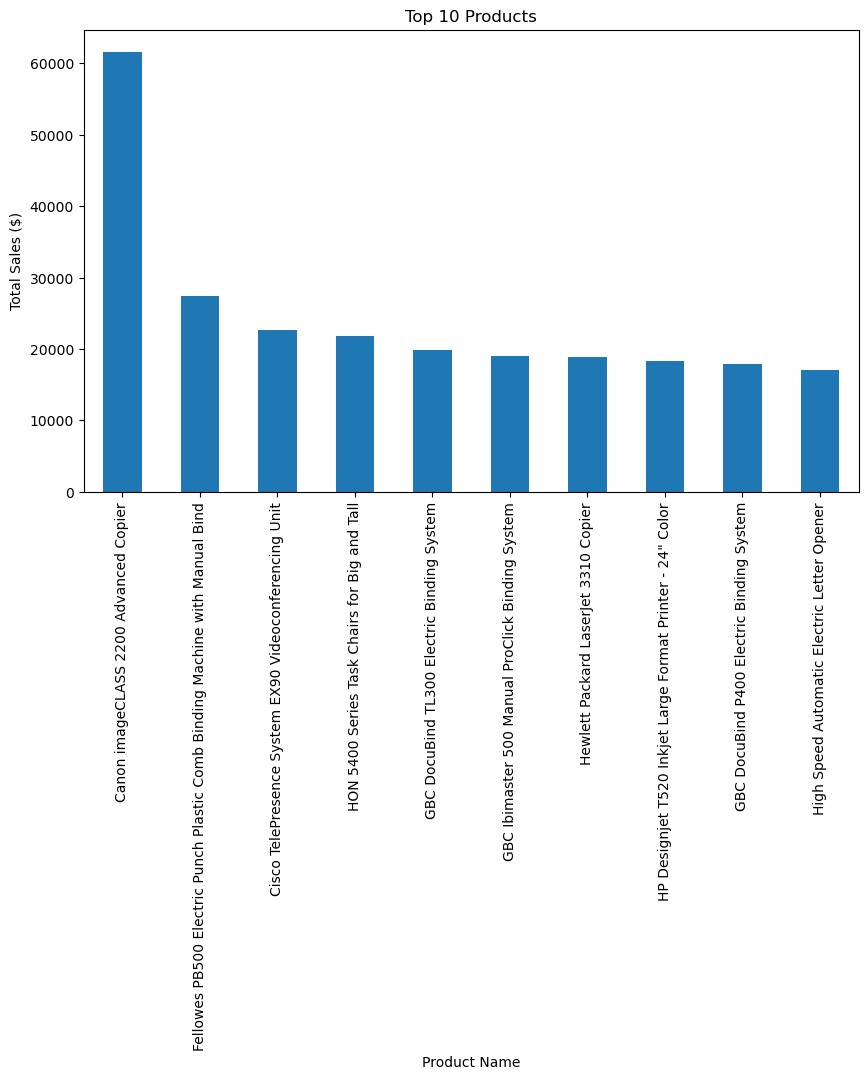

In [14]:
top_products = df.groupby('Product Name')['Sales'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
top_products.plot(kind='bar')
plt.ylabel("Total Sales ($)")
plt.title("Top 10 Products")
plt.xticks(rotation=90)
plt.savefig('./output/top_10_Products.jpg',bbox_inches='tight',dpi=200)
plt.show()

### Key Observations
1. The "Canon imageCLASS 2200 Advanced Copier" is the clear leader with > $60K in sales.  
2. Large gap between #1 and #2 products → focus marketing on top 5.  


## 6. Regional Analysis


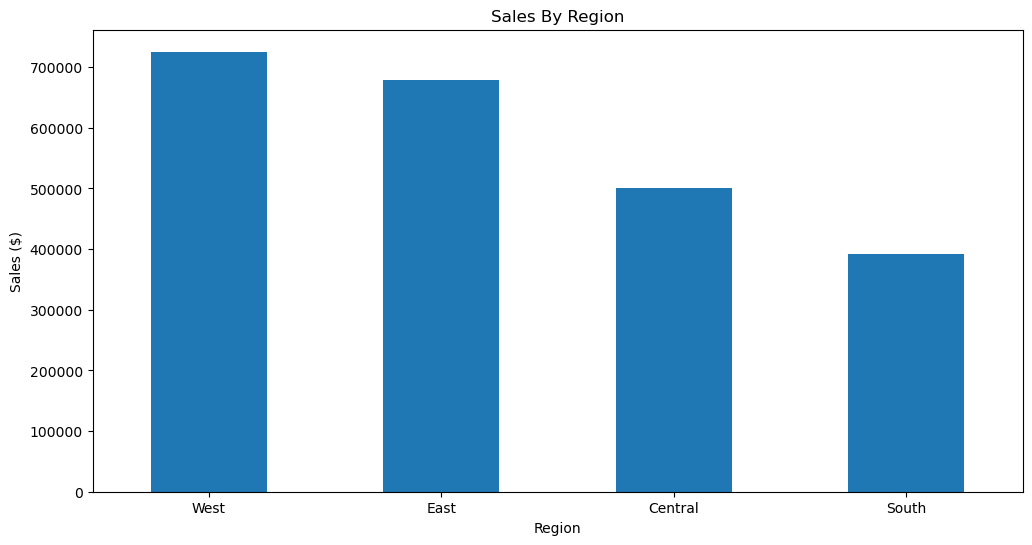

In [16]:
sales_by_region = df.groupby("Region")["Sales"].sum().sort_values(ascending=False)

plt.figure(figsize=(12,6))
sales_by_region.plot(kind="bar")
plt.ylabel("Sales ($)")
plt.title("Sales By Region")
plt.xticks(rotation=0)
plt.savefig('./output/sales_by_region.jpg',dpi=200)
plt.show()

### Key Observations
1. West & East dominate with > $650K each.  
2. Central & South underperform → require tailored sales strategies.  


## 7. Additional Insights


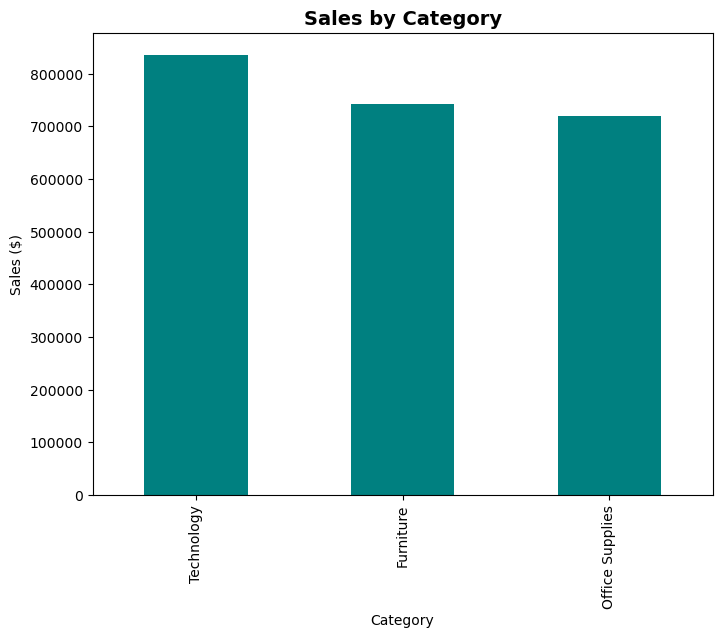

In [17]:
# Sales by Category
sales_by_category = df.groupby("Category")["Sales"].sum().sort_values(ascending=False)
sales_by_category.plot(kind="bar", color="teal", figsize=(8,6))
plt.title("Sales by Category", fontsize=14, fontweight="bold")
plt.ylabel("Sales ($)")
plt.show()


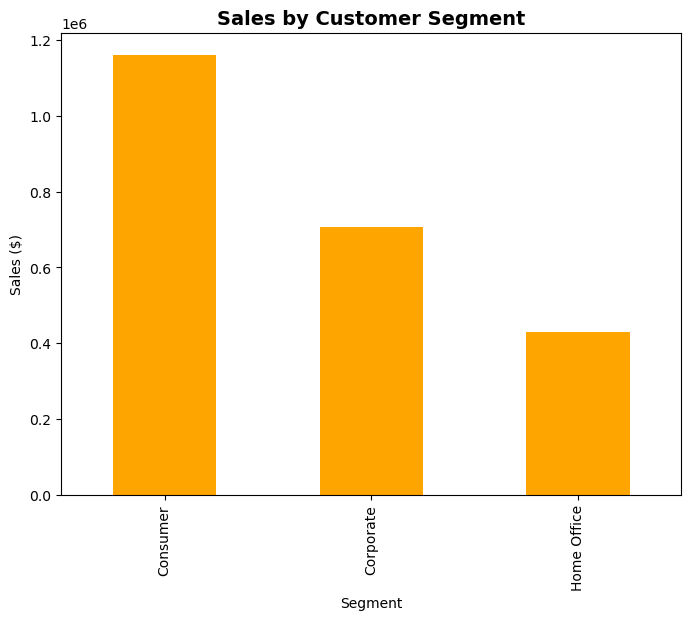

In [18]:
# Sales by Customer Segment
sales_by_segment = df.groupby("Segment")["Sales"].sum().sort_values(ascending=False)
sales_by_segment.plot(kind="bar", color="orange", figsize=(8,6))
plt.title("Sales by Customer Segment", fontsize=14, fontweight="bold")
plt.ylabel("Sales ($)")
plt.show()


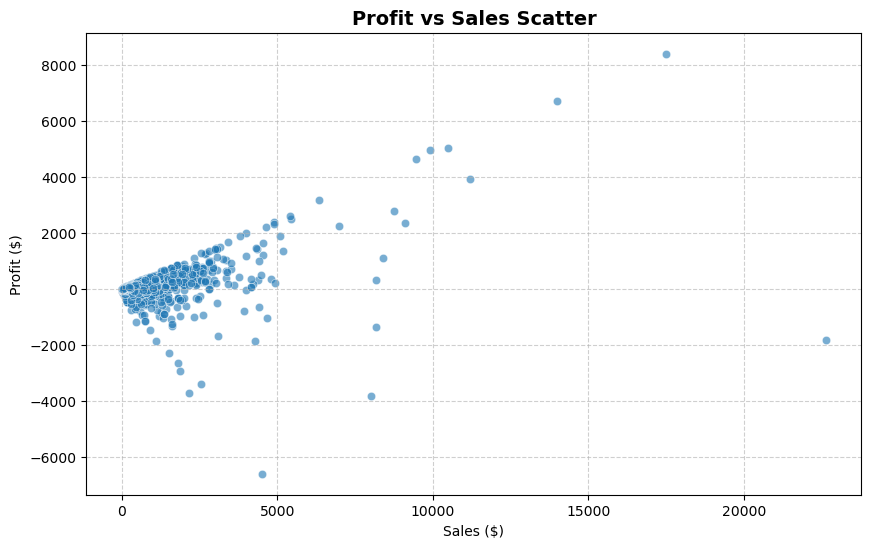

In [19]:
# Profit vs Sales Scatter
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x="Sales", y="Profit", alpha=0.6)
plt.title("Profit vs Sales Scatter", fontsize=14, fontweight="bold")
plt.xlabel("Sales ($)")
plt.ylabel("Profit ($)")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()


## 8. Business Recommendations

- **Stock & Marketing:** Prepare inventory before Q4 as sales peak towards year-end.  
- **Focus Products:** Canon Copier and other top products drive disproportionate revenue; allocate marketing budget accordingly.  
- **Regional Strategy:** West & East regions dominate sales; Central and South regions need tailored promotions.  
- **Customer Segments:** Corporate and Consumer buyers are strong contributors; consider loyalty programs.  
- **Profit Optimization:** Some high-sales products yield low profit → review discounting and pricing strategies.  


## 9. Conclusion

- **Total Sales:** $2,297,200.86

   
- **Total Profit:** $286,397.02  


- **Top-Selling Product:** Canon imageCLASS 2200 Advanced Copier  


- **Top Region:** West  


- **Peak Sales Period:** End of each year (Q4)  

This analysis highlights key opportunities for inventory planning, product focus, and regional strategy.
